<div style="background-color:white; color:black; padding:10px; width:100%;">
  <table style="width:100%; border:none;">
    <tr style="border:none;">
      <td style="text-align:left; border:none; vertical-align:middle;">
        <a href="https://dswa.vercel.app/" target="_blank">
          <img src="images/logo.svg" alt="Logo" style="height:120px;">
        </a>
      </td>
      <td style="text-align:right; border:none; vertical-align:middle;">
        <h2 style="margin:0; font-size:80px;">
          <strong href="https://dswa.vercel.app/" target="_blank" style="text-decoration:none; color:black; padding-right:40px;">
            DSWA
          </strong>
        </h2>
      </td>
    </tr>
  </table>
</div>

# Segmentação de Clientes com K-Means

**Tópico:** Aprendizado Não Supervisionado - Análise de Cluster

**Dataset:** [Mall Customer Segmentation Data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data)

### **Objetivo da Competição**

Bem-vindo(a)!

Neste notebook, vamos explorar o mundo do **Aprendizado Não Supervisionado**. Diferente do aprendizado supervisionado (onde temos um "gabarito" ou uma variável alvo, como "vendeu" ou "não vendeu"), aqui o objetivo é encontrar padrões e estruturas escondidas nos dados por conta própria.

Usaremos uma das técnicas mais famosas para isso: o **K-Means Clustering**. Nossa missão será agrupar clientes de um shopping com base em seus perfis de compra, criando "segmentos" ou "personas".

**A sua tarefa** será analisar esses segmentos e extrair insights de negócio a partir deles. Vamos começar!

### **Passo 1: Preparação do Ambiente**

Primeiro, vamos importar as bibliotecas que nos ajudarão nesta jornada.

-   **pandas:** para carregar e manipular nossos dados.
-   **numpy:** para operações numéricas.
-   **matplotlib & seaborn:** para criar visualizações incríveis.
-   **scikit-learn:** para usar o algoritmo K-Means.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

### **Passo 2: Carregando e Explorando os Dados (EDA - Exploratory Data Analysis)**

Vamos usar o dataset "Mall Customer Segmentation" do Kaggle. Ele contém informações básicas sobre os clientes de um shopping.

**Colunas do Dataset:**
*   **CustomerID:** ID único para cada cliente.
*   **Gender:** Gênero do cliente.
*   **Age:** Idade do cliente.
*   **Annual Income (k$):** Renda anual do cliente em milhares de dólares.
*   **Spending Score (1-100):** Uma pontuação de 1 a 100 atribuída pelo shopping com base no comportamento de gastos do cliente.

In [2]:
from io import StringIO

# Carregando o dataset
df = pd.read_csv('Mall_Customers.csv')

# Vamos dar uma primeira olhada nos dados
print("As 5 primeiras linhas do nosso dataset:")
display(df.head())

print("\nInformações gerais sobre as colunas:")
df.info()

print("\nVerificando se há valores nulos:")
print(df.isnull().sum())

As 5 primeiras linhas do nosso dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Informações gerais sobre as colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Verificando se há valores nulos:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


**Primeiras Impressões:**
*   Temos 200 registros (clientes).
*   As colunas estão com os tipos de dados corretos.
*   Ótima notícia: não temos valores nulos! Isso facilita nosso trabalho.

### **Passo 3: Visualizando os Dados**

A melhor forma de entender os dados é visualizando-os. Vamos criar alguns gráficos para encontrar padrões.

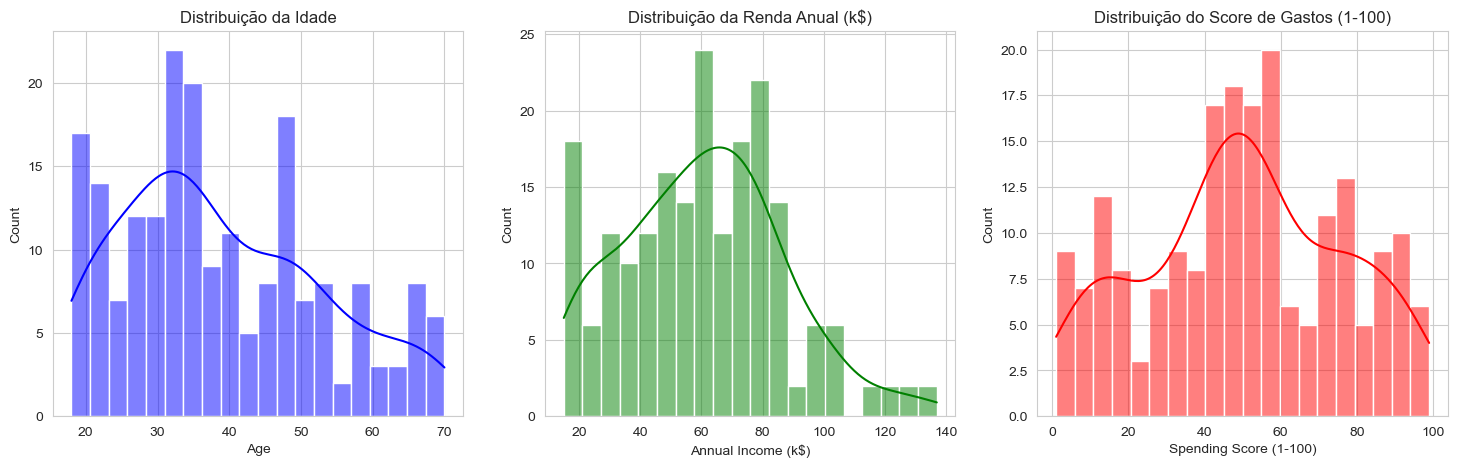

In [3]:
# Distribuição da Idade, Renda Anual e Score de Gastos
plt.figure(1, figsize=(18, 5))

# Gráfico da Idade
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Distribuição da Idade')

# Gráfico da Renda Anual
plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='green')
plt.title('Distribuição da Renda Anual (k$)')

# Gráfico do Score de Gastos
plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='red')
plt.title('Distribuição do Score de Gastos (1-100)')

plt.show()

**Análise dos Gráficos de Distribuição:**
*   **Idade:** A maior concentração de clientes está entre 20 e 40 anos.
*   **Renda Anual:** A maioria dos clientes tem uma renda entre 40k e 80k dólares.
*   **Score de Gastos:** A pontuação de gastos é mais concentrada no meio, entre 40 e 60.

Agora, vamos focar no que mais nos interessa: a relação entre **renda** e **score de gastos**. Um gráfico de dispersão (scatter plot) é perfeito para isso.

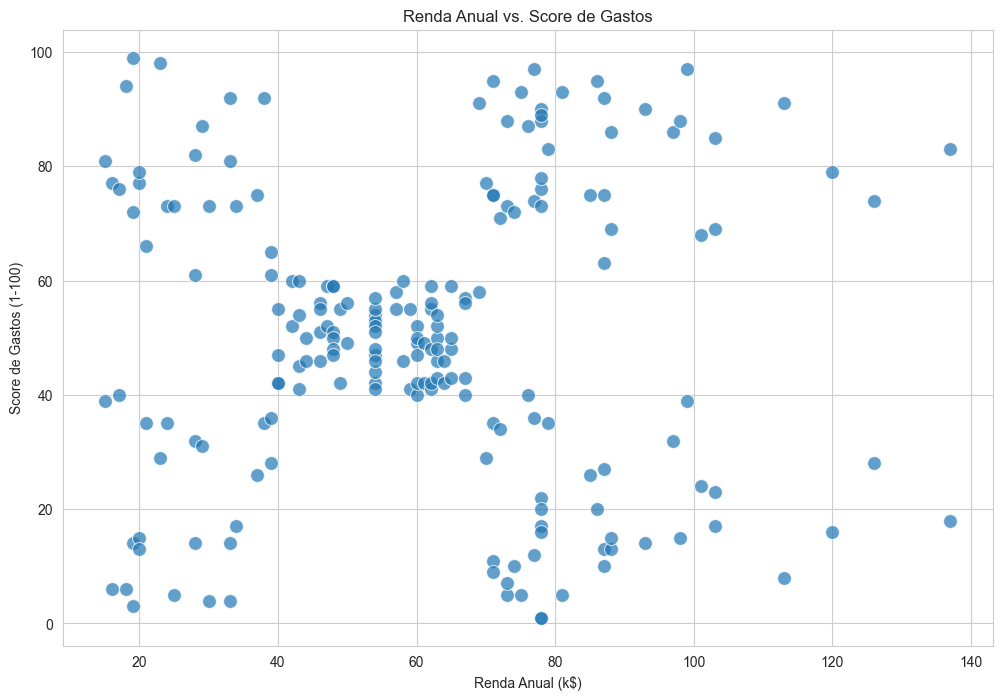

In [5]:
# Gráfico de Dispersão: Renda Anual vs. Score de Gastos
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, s=100, alpha=0.7)
plt.title('Renda Anual vs. Score de Gastos')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score de Gastos (1-100)')
plt.show()

**Observação Importante:**
Olhando para o gráfico acima, você consegue ver "grupos" ou "aglomerados" de pontos? Parece que existem cerca de 5 grupos distintos de clientes. É exatamente isso que o algoritmo K-Means vai tentar formalizar para nós!

### **Passo 4: Preparando os Dados e Encontrando o Número Ideal de Clusters**

O K-Means precisa saber quantos clusters (o "K" do nome) ele deve criar. Podemos usar uma técnica chamada **Método do Cotovelo (Elbow Method)** para nos ajudar a decidir.

A ideia é rodar o K-Means para vários valores de K (de 1 a 10, por exemplo) e medir a "inércia" de cada um. A inércia é a soma das distâncias quadradas de cada ponto ao centro do seu cluster. Queremos uma inércia baixa.

O "cotovelo" no gráfico é o ponto onde a inércia para de diminuir drasticamente. Esse é um bom indicativo do número ideal de clusters.

c:\Users\garan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\garan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\garan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\garan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

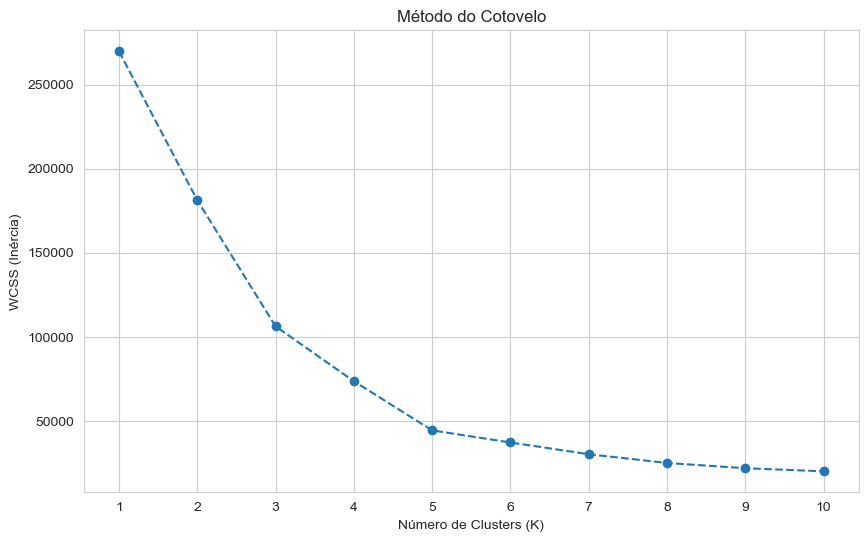

In [4]:
# Vamos focar nas duas variáveis que visualizamos: Renda e Score.
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Lista para armazenar a inércia (WCSS - Within-Cluster Sum of Squares)
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotando o gráfico do Método do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Inércia)')
plt.xticks(range(1, 11))
plt.show()

**Análise do Gráfico do Cotovelo:**
O "cotovelo" da curva é claramente no ponto **K=5**. A partir daí, a redução na inércia se torna muito menor. Portanto, 5 é o número ideal de clusters para nossos dados. Nossa intuição visual estava certa!

### **Passo 5: Aplicando o K-Means e Visualizando os Segmentos**

Agora que sabemos o número mágico (K=5), vamos aplicar o algoritmo e ver os resultados.

c:\Users\garan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


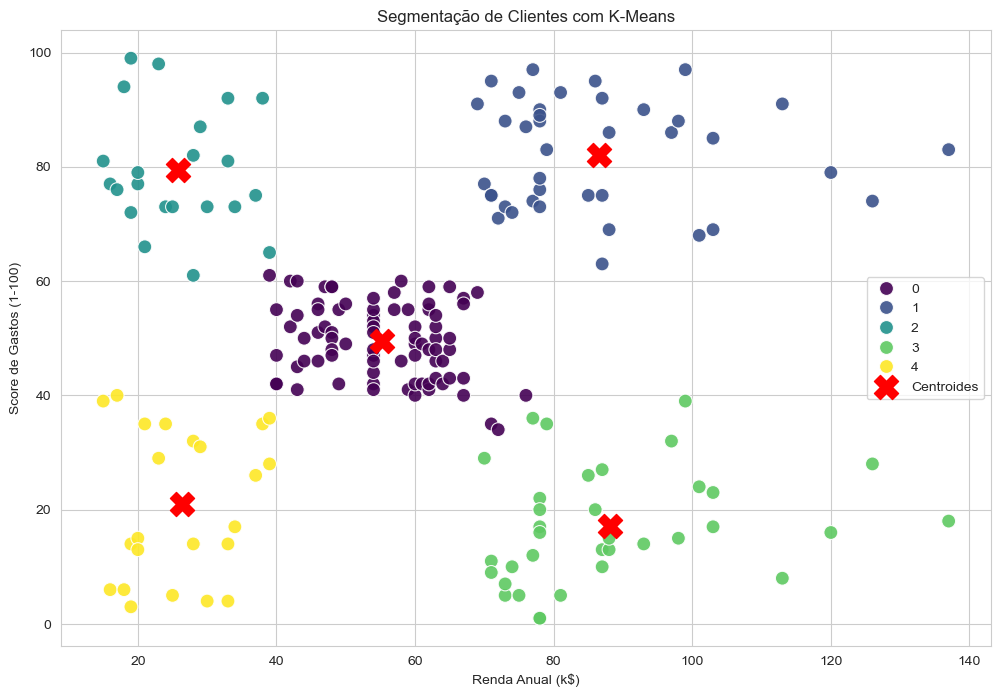

In [5]:
# Criando e treinando o modelo K-Means com 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Adicionando a coluna de 'Cluster' ao nosso DataFrame original
df['Cluster'] = y_kmeans

# Visualizando os clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.9)

# Plotando os centroides (o "coração" de cada cluster)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroides')

plt.title('Segmentação de Clientes com K-Means')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score de Gastos (1-100)')
plt.legend()
plt.show()

**Sucesso!** O algoritmo K-Means separou nossos clientes em 5 grupos distintos e visualmente coerentes. Agora vem a parte mais importante: entender o que cada grupo significa.

---

## **SUA VEZ**

Agora que os clusters foram criados, sua tarefa é se tornar um(a) analista de dados e transformar esses grupos em insights de negócio valiosos.

### **Tarefa 1: Análise e Interpretação dos Clusters**

Para cada um dos 5 clusters, você deve descrever o perfil dos clientes que pertencem a ele. Uma ótima maneira de começar é calculando a média das características para cada grupo.

**Dica:** Use o método `.groupby()` do pandas.

**Responda às seguintes perguntas (no seu relatório ou em uma célula de texto abaixo):**

1.  **Crie um "apelido" ou "persona" para cada cluster.** Por exemplo: "Econômicos", "Gastadores", "Público Alvo", "Pão-duro", etc. Justifique sua escolha com base nos dados.
2.  **Descreva em detalhes o perfil de cada cluster.**
    *   **Cluster 0:** Qual é a principal característica deste grupo? (Ex: Renda alta, Score baixo)
    *   **Cluster 1:** ...
    *   **Cluster 2:** ...
    *   **Cluster 3:** ...
    *   **Cluster 4:** ...
3.  **Qual cluster você considera o mais valioso para o shopping? E o menos valioso?** Por quê?

In [11]:
results = pd.DataFrame()
results['Media Income'] = df.groupby('Cluster')['Annual Income (k$)'].mean()
results['Media Spending Score'] = df.groupby('Cluster')['Spending Score (1-100)'].mean()

display(results)

,Media Income,Media Spending Score
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


Apelidos e detalhes de cada perfil:
* Cluster 0: Intermediários, é o grupo mais mediano, com uma média de renda 55, não muito alta nem muito baixa quando comparada com as outras (25, 26, 86 e 88), e uma média de spending score também nessa faixa, um pouco abaixo da sua média de renda, esse grupo não gasta mais do que são capazes.  
* Cluster 1: Gastadores, é o grupo com segunda maior média de renda (86.53) e maior spending score (82.12) entre todos os grupos. De forma semelhante ao anterior, esse cluster também não costuma gastar mais do que possível.  
* Cluster 2: Público alvo, a perspectiva do shopping, esse é o grupo de consumidores mais interessante, aqueles que, mesmo possuindo a menor renda média, gastam muito além dela, com um spending score de 79, o segundo maior, mais que três vezes a renda média do grupo.  
* Cluster 3: Pão duro, grupo que possuem tanto a maior renda média quanto o menor spending score entre todos os clusters.  
* Cluster 4: Econômicos, cluster que possui uma baixa renda média (26.30) e um spending score igualmente baixo (20.91).

Considero o cluster 2 o mais valioso para o shopping. Mesmo que este não possua o maior spending score médio (79, quando comparado com o maior de 82), esse valor é mais que três vezes maior que sua renda média, demonstrando que os consumidores deste grupo provavelmente não se preocupam muito em comprar somente o necessário, mais eficiente ou etc. mas apenas o que parece atrativo. Logo, para atrair clientes desse grupo, o shopping provavelmente precisa de menos investimento quando comparado com o cluster 1, que possui maior spending score.

O cluster menos valioso é um pouco mais difícil de decidir, mas a escolha é definitivamente entre os clusters 3 e 4, com base nas seguintes observações:
* Mesmo que o cluster 3 possua o menor spending score (17), sua renda média ainda é a mais alta, ou seja, caso algum produto ou serviço interessante apareça (mesmo que dificilmente), esse grupo ainda possuiria a capacidade de gastar mais sem se preocupar com sua renda.
* Já o cluster 4, com segunda menor renda média (26) e segundo menor spending score (20.9), além de demonstrarem um bom gerenciamento de suas economias, com spending score um pouco menor que sua renda média, não possuem uma renda muito alta, isto é, mesmo que algum produto ou serviço interessante apareça (mesmo que dificilmente), esse grupo provavelmente não possuiria a capacidade de gastar mais.

Dessa forma, acredito que, mesmo que esses dois clusters sejam quase que igualmente não-valiosos para o shopping, o cluster 3 ainda seria um pouco mais interessante.


### **Tarefa 2: Desafio - Incluindo a Idade na Análise**

Nosso modelo usou apenas Renda e Score de Gastos. O que acontece se incluirmos a **Idade** na clusterização?

1.  **Repita o processo de clusterização (Passos 4 e 5)**, mas desta vez usando as colunas `Age`, `Annual Income (k$)` e `Spending Score (1-100)`.
2.  Você pode manter K=5 ou usar o Método do Cotovelo novamente para ver se um número diferente de clusters seria melhor com 3 variáveis.
3.  **Analise os novos clusters.** Eles são parecidos com os que você encontrou na Tarefa 1? A idade parece ser um fator importante para separar os grupos?
4.  **Atenção:** Você não poderá mais usar um gráfico de dispersão 2D para visualizar os clusters, pois agora temos 3 dimensões. A análise terá que ser feita principalmente com base nos valores médios de cada cluster (como no `groupby` da Tarefa 1).

c:\Users\garan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\garan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\garan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\garan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

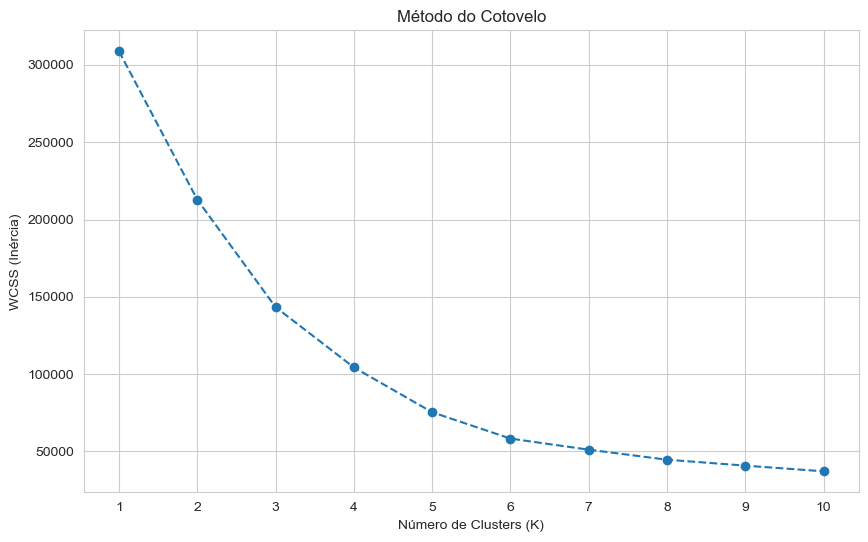

In [16]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotando o gráfico do Método do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Inércia)')
plt.xticks(range(1, 11))
plt.show()

In [17]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

df['Cluster_2'] = y_kmeans

results_2 = pd.DataFrame()
results_2['Media Idade'] = df.groupby('Cluster_2')['Age'].mean()
results_2['Media Income'] = df.groupby('Cluster_2')['Annual Income (k$)'].mean()
results_2['Media Spending Score'] = df.groupby('Cluster_2')['Spending Score (1-100)'].mean()

display(results)
display(results_2)

c:\Users\garan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Media Income,Media Spending Score
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


,Media Idade,Media Income,Media Spending Score
Cluster_2,,,
0,56.155556,53.377778,49.088889
1,41.685714,88.228571,17.285714
2,25.272727,25.727273,79.363636
3,27.000000,56.657895,49.131579
4,32.692308,86.538462,82.128205
5,44.142857,25.142857,19.523810


Os clusters que continuaram semelhantes (nos resultados antigos e agora, com idade) foram:
* 0 e (0 e 3);
* 1 e 4;
* 2 e 2;
* 3 e 1;
* 4 e 5;

Ou seja, a idade serviu para, além de mostrar algumas características como o grupo 'Público alvo', com baixa renda média e alto spending score possuir a menor idade média, é possível observar que o grupo 'Intermediários' foi dividido em dois clusters, um com idade média de 56 anos e outro com média de 27 anos.

### **Tarefa 3: Conclusões e Recomendações de Negócio**

Com base na sua análise da **Tarefa 1**, escreva um parágrafo final com recomendações para a equipe de marketing do shopping.

*   Que tipo de campanha de marketing você criaria para o cluster dos "clientes com alta renda e alto score de gastos"?
*   E para o grupo de "baixa renda e alto score de gastos"?
*   Como o shopping poderia tentar engajar o grupo de "alta renda e baixo score de gastos" para que eles gastem mais?

* Para o cluster dos clientes com alta renda e alto score de gastos, seria interessante a realização de marketing com base em itens de luxo, exclusivos, além de serviços mais caros e únicos, com foco maior na experiência, algo que faria esse grupo se sentir mais "especial" e diferencial.
* Para o grupo de baixa renda e alto score de gastos, caso o foco do shopping seja apenas no lucro, provavelmente seriam eficientes promoções "relâmpago", promocionadas como imperdíveis, algo que faria esse grupo gastar antes que eles possam pensar se aquilo realmente compensa.
* Já o grupo de alta renda e baixo score de gastos, possivelmente seria interessante um foco em produtos mais eficientes e práticos, mesmo que mais caros, mas com um foco alto na qualidade, coisas que não seria muito do interessante dos grupos restantes.

---

**Formato de Entrega:**
Entregue este notebook com todas as células executadas e suas respostas para as Tarefas 1, 2 e 3 preenchidas em células de texto (Markdown) e código.

**Boa sorte e boa análise!**